Importing and cleaning Data

In [ ]:
import pandas as pd
import numpy as np

# Import data

df_f = pd.read_csv("/content/drive/MyDrive/walmart project/features.csv")
df_st = pd.read_csv("/content/drive/MyDrive/walmart project/stores.csv")
df_train = pd.read_csv("/content/drive/MyDrive/walmart project/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/walmart project/test.csv")

# Convert date column into datetime
df_f["Date"] = pd.to_datetime(df_f["Date"])
df_train["Date"] = pd.to_datetime(df_train["Date"])
df_test["Date"] = pd.to_datetime(df_test["Date"])

In [ ]:
# Merging test and train dataset
df_all_train = df_train.merge(df_f, how="left", on=["Store","Date","IsHoliday"])
df_all_train = df_all_train.merge(df_st, how="left", on=["Store"])

df_all_test = df_test.merge(df_f, how="left", on=["Store","Date","IsHoliday"])
df_all_test = df_all_test.merge(df_st, how="left", on=["Store"])

df_all_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [ ]:
df_all_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,B,118221
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,B,118221
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,B,118221
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,B,118221


In [ ]:
# Encoding True/False to binary values
df_all_train = df_all_train.applymap(lambda x: 1 if x == True else x)
df_all_train = df_all_train.applymap(lambda x: 0 if x == False else x)

df_all_test = df_all_test.applymap(lambda x: 1 if x == True else x)
df_all_test = df_all_test.applymap(lambda x: 0 if x == False else x)

In [ ]:
 #Filling empty values with averages
df_all_train[["Temperature"]] = df_all_train[["Temperature"]].fillna(df_all_train[["Temperature"]].mean())
df_all_train[["Fuel_Price"]] = df_all_train[["Fuel_Price"]].fillna(df_all_train[["Fuel_Price"]].mean())
df_all_train[["CPI"]] = df_all_train[["CPI"]].fillna(df_all_train[["CPI"]].mean())
df_all_train[["Unemployment"]] = df_all_train[["Unemployment"]].fillna(df_all_train[["Unemployment"]].mean())

df_all_test[["Temperature"]] = df_all_test[["Temperature"]].fillna(df_all_test[["Temperature"]].mean())
df_all_test[["Fuel_Price"]] = df_all_test[["Fuel_Price"]].fillna(df_all_test[["Fuel_Price"]].mean())
df_all_test[["CPI"]] = df_all_test[["CPI"]].fillna(df_all_train[["CPI"]].mean())
df_all_test[["Unemployment"]] = df_all_test[["Unemployment"]].fillna(df_all_test[["Unemployment"]].mean())

df_all_train = df_all_train.fillna(0)
df_all_test = df_all_test.fillna(0)

In [ ]:
dum=pd.get_dummies(df_all_train['Type'], sparse=True)
df_all_train['Type A']=dum['A']
df_all_train['Type B']=dum['B']
df_all_train['Type C']=dum['C']

dum=pd.get_dummies(df_all_test['Type'], sparse=True)
df_all_test['Type A']=dum['A']
df_all_test['Type B']=dum['B']
df_all_test['Type C']=dum['C']

CORRELATION HEAT MAP

<ipython-input-9-617af502cfeb>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_all_train.corr(),cmap="Blues")


<Axes: >

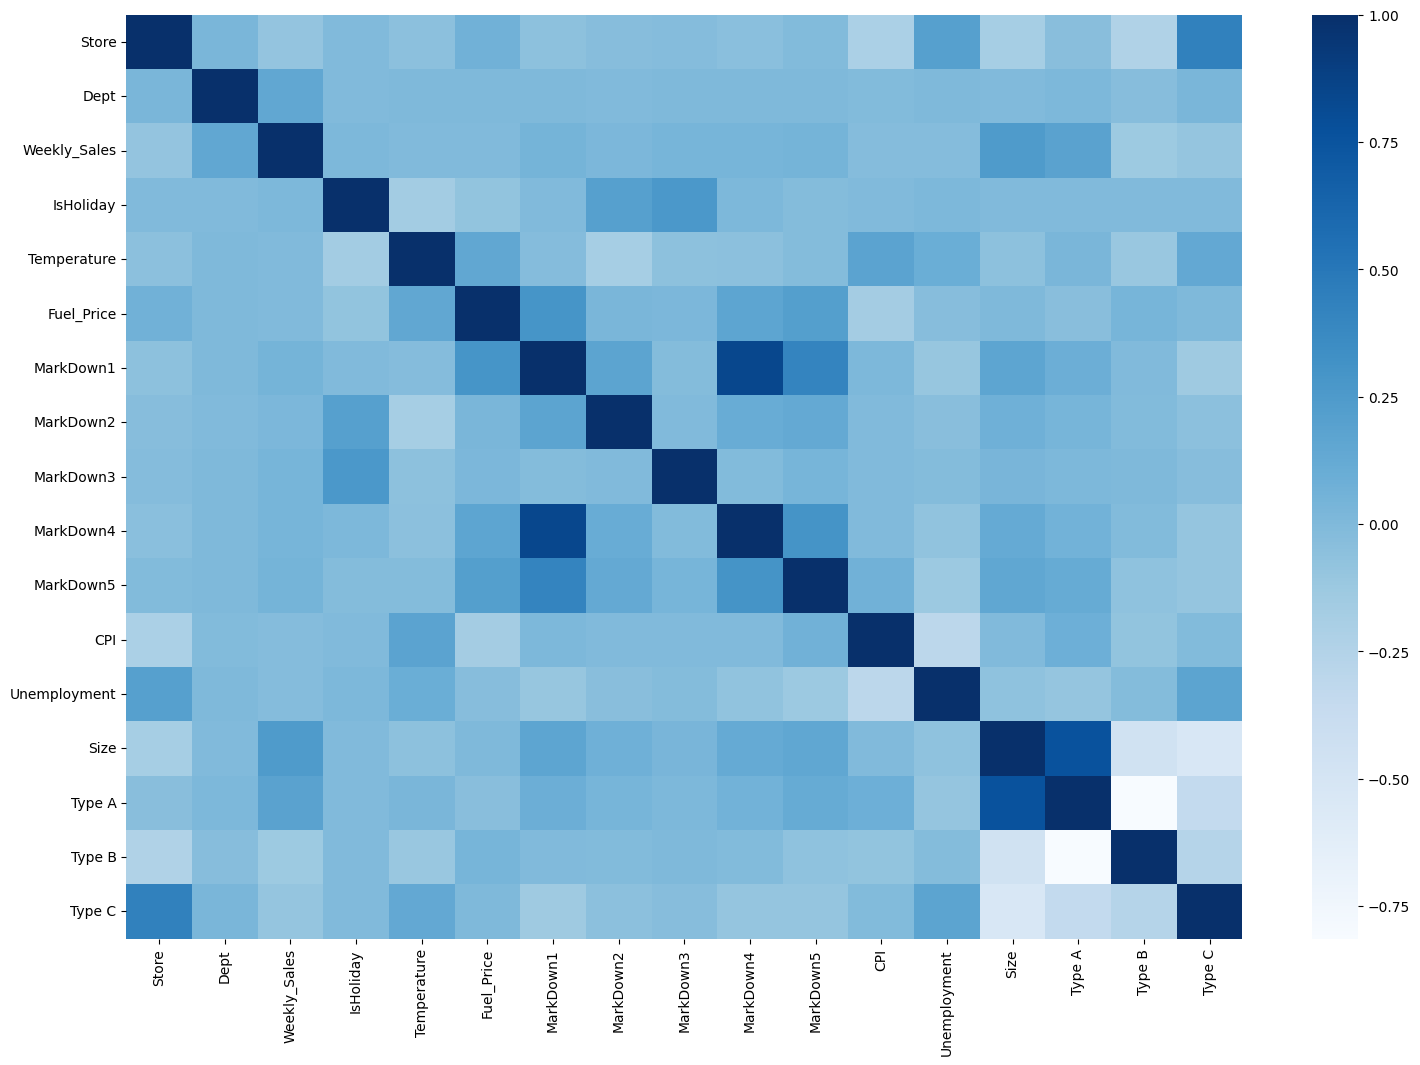

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (18,12))

sns.heatmap(df_all_train.corr(),cmap="Blues")

# Inferences -

1. Department, Store size and Type have moderate correlation with the weekly sales

2. Markdown1-5 have very weak correlation with the weekly sales, so we will leave these columns out

3. Temperature. Fuel price, CPI and Unemployment are very weakly coorelated with the weekly sales, so these columns will also be dropped out


# Trend in Different Features

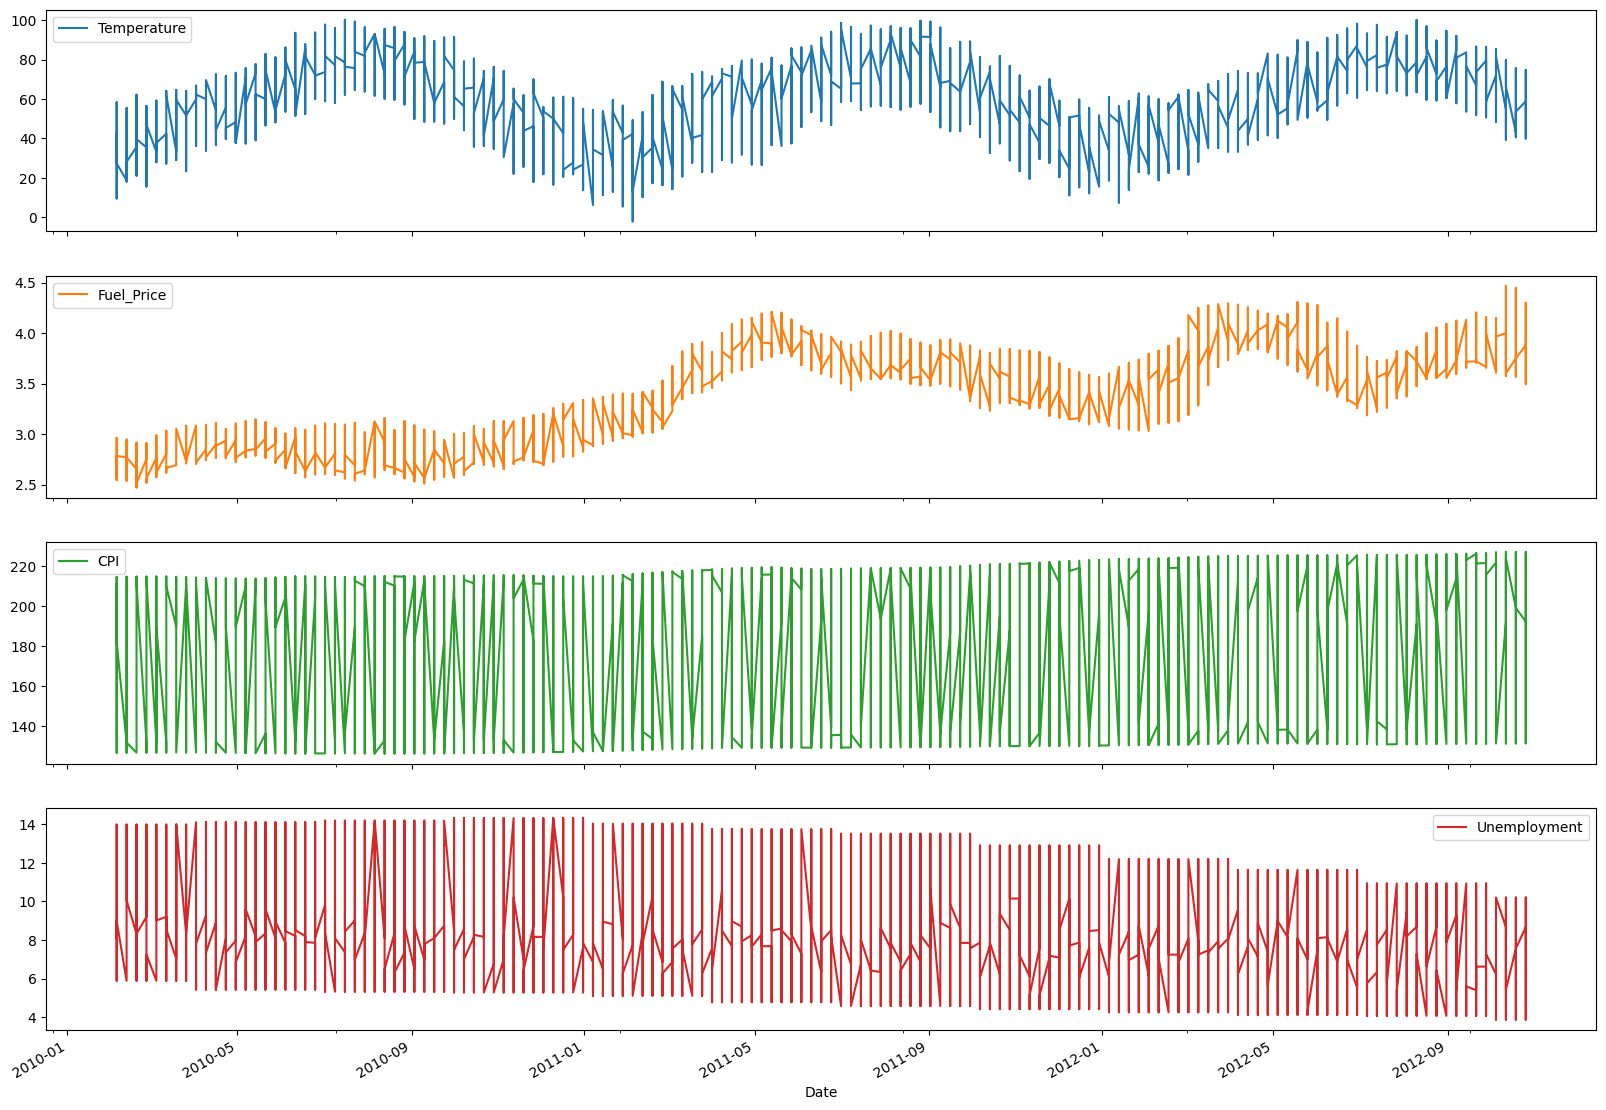

In [ ]:
df_all_train[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].plot(x='Date', subplots=True, figsize=(20,15))

plt.show()

# Inferences -

1. Discounts: We have a few spikes, but not too many to make assumptions of the affects of it.

2. Temperature: it seems like it is decently seasonal, which is reasonable when we talk about temperature on a YoY basis.

3. Fuel Price: Has a slight positive trend.

4. Unemployment: Has a slight negative trend over this timeframe.

# Weakly Sales Plot

<function matplotlib.pyplot.show(close=None, block=None)>

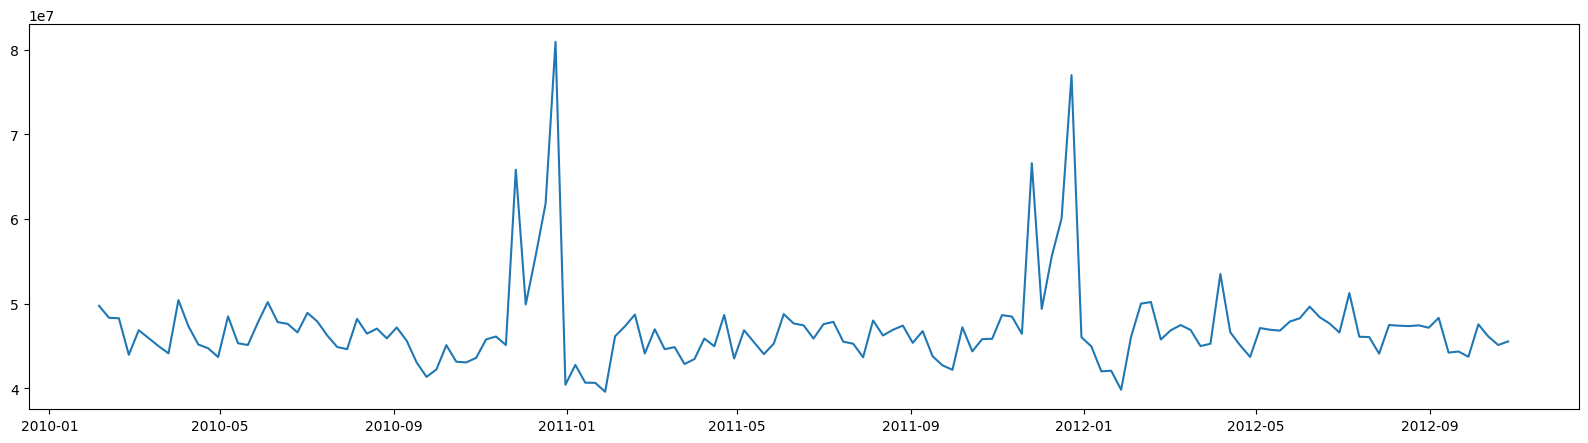

In [ ]:
df_average_sales_weekly = df_all_train.groupby(by=["Date"], as_index = False)["Weekly_Sales"].sum()
plt.figure(figsize=(20,5))
plt.plot(df_average_sales_weekly.Date, df_average_sales_weekly.Weekly_Sales)
plt.show

# Inferences -

Peak in Demand - The end of December seems like a popular time to buy our company's specific products.

Dip in Demand - Around the end of january it seems to be a pretty steep dip

# Relation between size of the store and sales

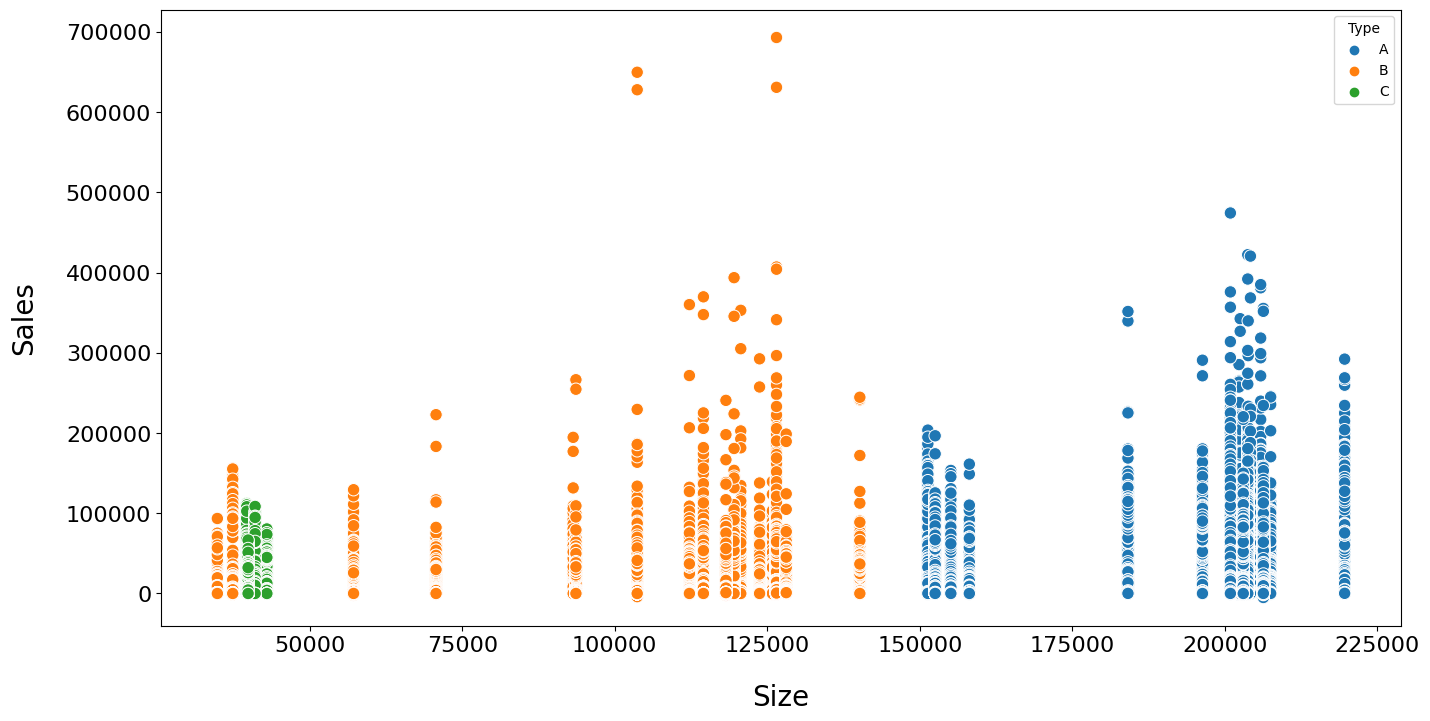

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df_all_train.Size, y=df_all_train.Weekly_Sales, hue=df_all_train.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Size', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

# Inferences -

The size of the store shows a linear relationship with the weekly sales.

# Relation between temperature and sales

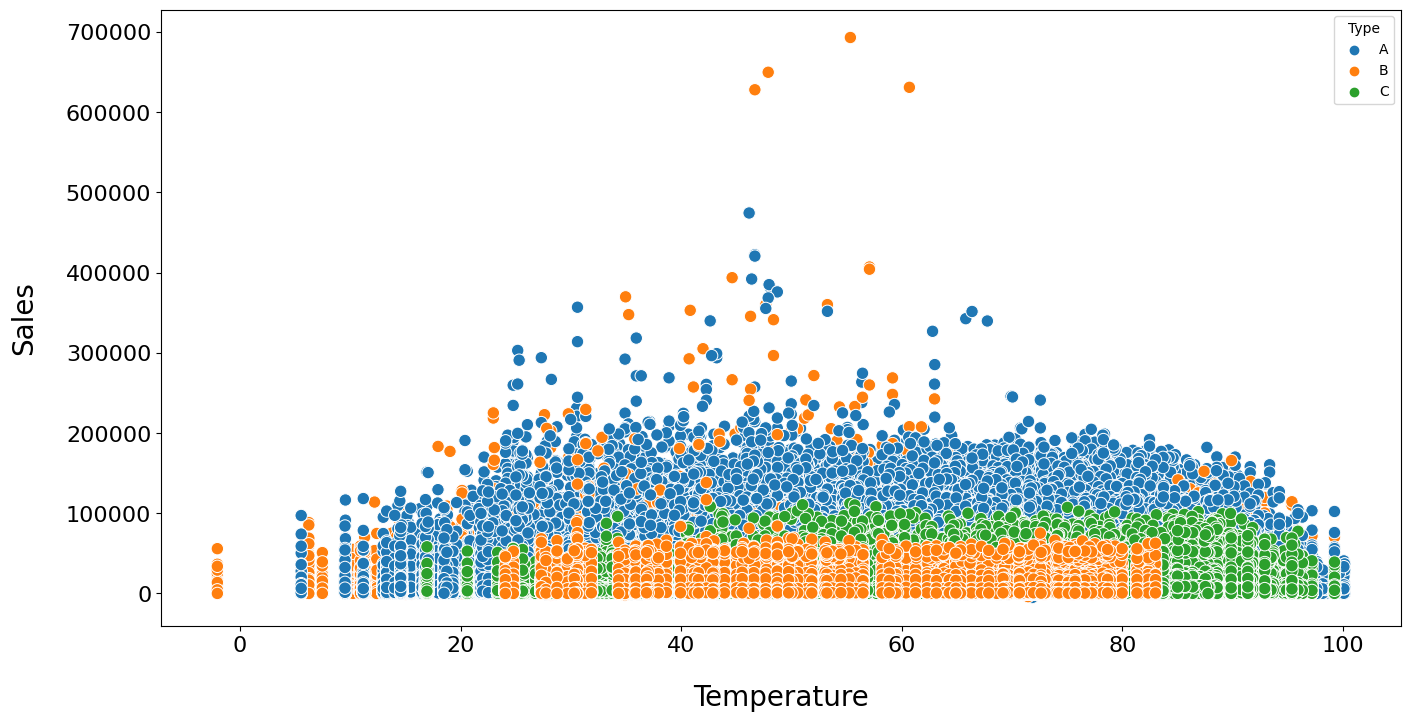

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df_all_train.Temperature, y=df_all_train.Weekly_Sales, hue=df_all_train.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Temperature', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

# Inferences -

At low and very high temperatures the sales seems to dip a bit but in general there doesn't exist a clear relationship

# Relation between Fuelprice and sales

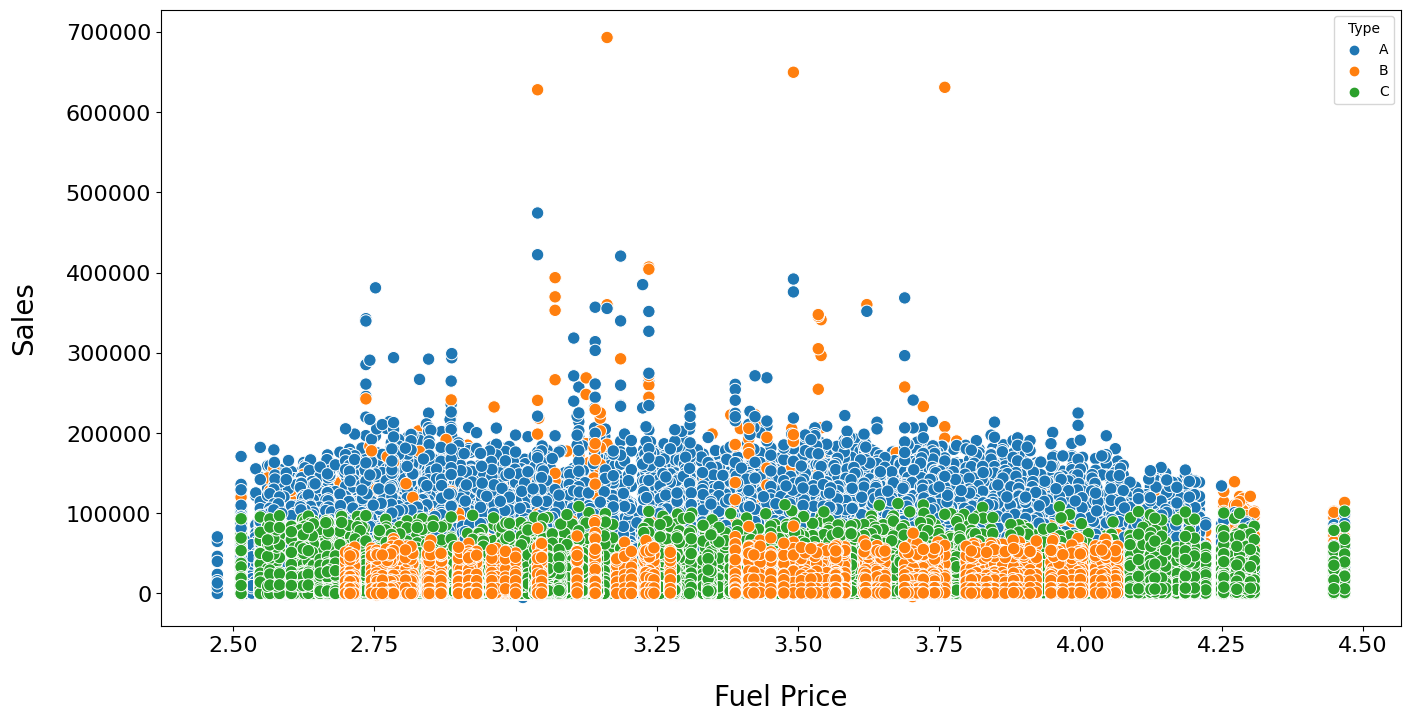

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df_all_train.Fuel_Price, y=df_all_train.Weekly_Sales, hue=df_all_train.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Fuel Price', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

# Inferences -

There doesn't exist a clear relationship

# Relation betweeen Unemployment and sales

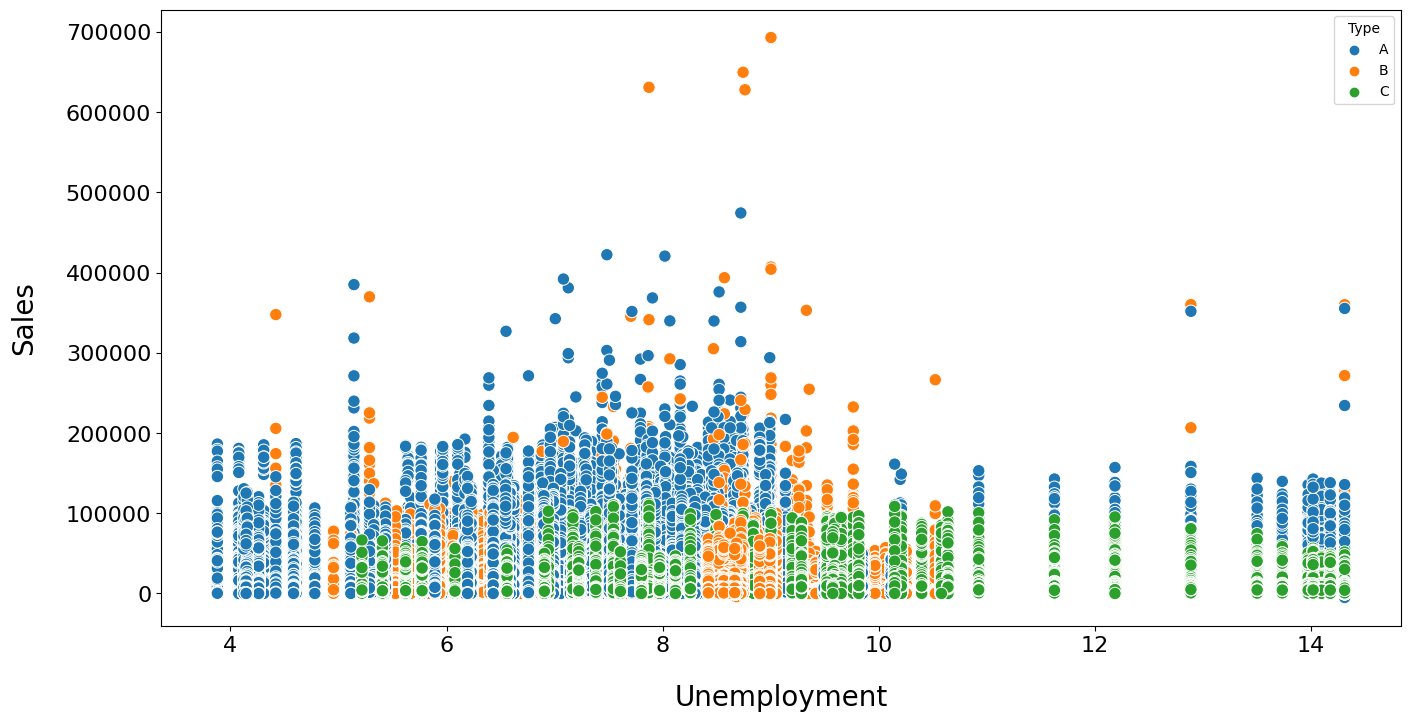

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df_all_train.Unemployment, y=df_all_train.Weekly_Sales, hue=df_all_train.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Unemployment', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

# Inferences -

There doesn't exist a clear relationship

# Data preparation for Model Training

In [ ]:
from sklearn.model_selection import train_test_split
train_all = df_all_train

train_X = df_all_train.drop(["Weekly_Sales", 'Date', 'Type', 'Temperature','Fuel_Price', 'CPI', 'Unemployment'], axis=1)
train_y = train_all["Weekly_Sales"]
test_X = df_all_test

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, shuffle=False, stratify=None)


# RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

score = r2_score(y_test, y_pred)
print("R^2:", score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


MSE:  96461297.9460987
RMSE:  9821.471271968305
R^2: 0.7336630277248162


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

score = r2_score(y_test, y_pred)
print("R^2:", score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


MSE:  302530737.6705286
RMSE:  17393.41075437847
R^2: 0.1646896485223449


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


# RIDGE REGRESSOR

In [ ]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train,y_train)
y_pred=rid.predict(X_test)

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

score = r2_score(y_test, y_pred)
print("R^2:", score)

MSE:  331070035.1866572
RMSE:  18195.330037860185
R^2: 0.0858904798075123


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


# DECISION TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

score = r2_score(y_test, y_pred)
print("R^2:", score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


MSE:  123813601.29262277
RMSE:  11127.156028951098
R^2: 0.65814124009413


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


# EXTRA TREE REGRESSOR

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr_random_best = ExtraTreesRegressor(bootstrap=False, criterion="mse", max_depth=None,
                                      max_features="auto", max_leaf_nodes=None,
                                      min_impurity_decrease=0.0, min_impurity_split=None,
                                      min_samples_leaf=2, min_samples_split=5,
                                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=30,
                                      oob_score=False, random_state=None, warm_start=False)
etr_random_best.fit(X_train, y_train)
y_pred = etr_random_best.predict(X_test)

print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

score = r2_score(y_test, y_pred)
print("R^2:", score)






TypeError: ignored

In [ ]:
y_pred

# LINEAR REGRESSOR

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

score = r2_score(y_test, y_pred)
print("R^2:", score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


MSE:  331069119.8435475
RMSE:  18195.30488459997
R^2: 0.0858930071393813


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


# LASSO REGRESSION

In [ ]:
las = linear_model.Lasso()
las.fit(X_train, y_train)
y_pred = las.predict(X_test)

print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

score = r2_score(y_test, y_pred)
print("R^2:", score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


MSE:  331153980.2303852
RMSE:  18197.63666607247
R^2: 0.08565870116405572


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



# HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

param_grid = {'min_samples_leaf': [1, 5, 10], 'min_samples_split': [1, 5, 10],
              'n_estimators': [10, 100, 500]}

etr_random_best = ExtraTreesRegressor(bootstrap=False, criterion="mse", max_depth=None,
                                      max_features="auto", max_leaf_nodes=None,
                                      min_impurity_decrease=0.0, min_impurity_split=None,
                                      min_weight_fraction_leaf=0.0, n_jobs=1,
                                      oob_score=False, random_state=None, warm_start=False)

g_search = GridSearchCV(estimator = etr_random_best, param_grid = param_grid,
                        cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

g_search.fit(X_train, y_train);

print(g_search.best_params_)




# FEATURE IMPORTANCE

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': etr_random_best.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

Lasso Regression -

1. MSE: 331153980.23

2. RMSE: 18197.64

3. R^2: 0.086

Linear Regression -

1. MSE: 331069119.84

2. RMSE: 18195.30

3. R^2: 0.085

Extra Trees Regressor -

1. MSE: 66367571.79

2. RMSE: 8146.63

3. R^2: 0.82

Decision Tree Regressor -

1. MSE: 112286991.06

2. RMSE: 10596.56

3. R^2: 0.69

KNN -

1. MSE: 275415902.31

2. RMSE: 16595.65

3. R^2: 0.24

Random Forest Regressor -

1. MSE: 96451071.76

2. RMSE: 9820.96

3. R^2: 0.73


The best performer among all the models is "Extra Trees Regressor" with tuned Hyperparameters